In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FDF = pd.read_csv('FDF.csv')

In [3]:
#Count the number of contents created by countries
content_counts = FDF["Country"].value_counts(sort=True)
print(content_counts.head(10))

United States     10162
India              1482
United Kingdom     1208
Canada              659
Japan               377
South Korea         278
Australia           258
France              235
Spain               183
Hong Kong           170
Name: Country, dtype: int64


In [4]:
#changing the year column of the dataset so that MSN takes priorety in the year column
def MSN_Years(row):
    if ' or ' in str(row['Year']):
        both = str(row['Year']).split(' or ')
        return str(both[0])
#making a copy of FDF to perform the operation on
FDF_A = FDF
#performing the operation on the copy of FDF
FDF_A['Year'] = FDF_A.apply(lambda row: MSN_Years(row), axis=1)

In [6]:
FDF_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25652 entries, 0 to 25651
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25652 non-null  int64  
 1   Title            25652 non-null  object 
 2   date_added       7794 non-null   object 
 3   description      7804 non-null   object 
 4   Age              10519 non-null  object 
 5   IMDb             20623 non-null  float64
 6   Rotten Tomatoes  6169 non-null   object 
 7   Netflix          22355 non-null  float64
 8   Hulu             22355 non-null  float64
 9   Prime Video      22355 non-null  float64
 10  Disney+          22355 non-null  float64
 11  Language         16145 non-null  object 
 12  type             25652 non-null  object 
 13  Runtime          21072 non-null  object 
 14  Directors        18576 non-null  object 
 15  Country          20706 non-null  object 
 16  Year             1127 non-null   object 
dtypes: float64(5

In [8]:
#Group by years in columns of Netflix, Hulu,Prime Video, Disney+ and sum their values
years = FDF_A[(FDF_A['Year'] >= '2015')& (FDF_A['Year'] <= '2020')]
count1 = years.groupby('Year')['Netflix', 'Hulu','Prime Video', 'Disney+'].sum()
count1.head()

/Users/jonghyeongkim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Netflix,Hulu,Prime Video,Disney+
Year,,,,
2015,83.0,7.0,12.0,0.0
2016,107.0,7.0,25.0,1.0
2017,141.0,11.0,18.0,0.0
2018,160.0,14.0,30.0,2.0
2019,157.0,13.0,18.0,0.0


In [9]:
#Adding Total column from groupby previously
total = count1.columns[ : count1.shape[1]-1]
count1["Total"] = count1[total].sum(axis=1)
print(count1)

      Netflix  Hulu  Prime Video  Disney+  Total
Year                                            
2015     83.0   7.0         12.0      0.0  102.0
2016    107.0   7.0         25.0      1.0  139.0
2017    141.0  11.0         18.0      0.0  170.0
2018    160.0  14.0         30.0      2.0  204.0
2019    157.0  13.0         18.0      0.0  188.0
2020    136.0   6.0         15.0      0.0  157.0


In [10]:
#Get the Total vs Year
total = count1["Total"]
print(total)

Year
2015    102.0
2016    139.0
2017    170.0
2018    204.0
2019    188.0
2020    157.0
Name: Total, dtype: float64


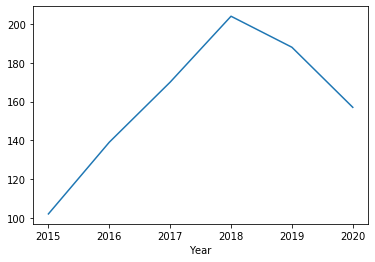

In [11]:
#Plot the line for Total vs Year(2015-2020)
total.plot(kind='line')

### What is the relationship between Years and Runtime?

In [12]:
#making a new subset of the data with only year and runtime
FDF = pd.read_csv('FDF.csv')
data = [FDF["Year"], FDF["Runtime"]]
headers = ["Year", "Runtime"]
FDF_B = pd.concat(data, axis=1, keys=headers)
FDF_B

,Year,Runtime
0,2020 or 2016,4 Seasons
1,2016,93 or 94
2,2011,78
3,2009,80 or 79
4,2008,123
...,...,...
25647,2018,NaN
25648,2017,NaN
25649,2018,NaN
25650,2017,NaN


In [14]:
#getting rid of data we don't need for this question

#changing the year column of the dataset so that MSN takes priorety
def MSN_Years(row):
    if ' or ' in str(row['Year']):
        both = str(row['Year']).split(' or ')
        return str(both[0])
    else:
        return row['Year']

#performing the operation on the copy of FDF
FDF_B['Year'] = FDF_B.apply(lambda row: MSN_Years(row), axis=1)

In [15]:
#changing the Runtime column of the dataset so that MSN takes priorety
def MSN_Runtimes(row):
    if ' or ' in str(row['Runtime']):
        both = str(row['Runtime']).split(' or ')
        return str(both[0])
    else:
        return row['Runtime']

#performing the operation on the copy of FDF
FDF_B['Runtime'] = FDF_B.apply(lambda row: MSN_Runtimes(row), axis=1)

#removing seasons in the Runtime column
def No_Seasons(row):
    if 'Seasons' in str(row['Runtime']):
        return np.nan
    elif 'Season' in str(row['Runtime']):
        return np.nan
    else:
        return row['Runtime']

#performing the operation on the copy of FDF
FDF_B['Runtime'] = FDF_B.apply(lambda row: No_Seasons(row), axis=1)

#making sure all remaining values are numeric
FDF_B["Runtime"] = pd.to_numeric(FDF_B.Runtime)
FDF_B["Year"] = pd.to_numeric(FDF_B.Year)

#dropping na
FDF_B = FDF_B.dropna()

FDF_B

,Year,Runtime
1,2016,93.0
2,2011,78.0
3,2009,80.0
4,2008,123.0
6,2019,95.0
...,...,...
21500,1974,89.0
21501,2000,72.0
21502,1980,120.0
21503,2001,90.0


In [16]:
#Running Linear regression to determine relationship between runtime and year
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x=FDF_B["Year"].values.reshape(-1,1)
y=FDF_B["Runtime"].values.reshape(-1,1)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)

model.coef_

/Users/jonghyeongkim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/jonghyeongkim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

array([[0.08900831]])

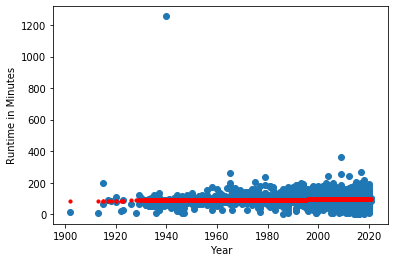

In [17]:
#Making a scatterplot of results
plt.scatter(xtest,ytest)
plt.scatter(xtest,ypred_test,c='r',s=10)
plt.xlabel("Year")
plt.ylabel("Runtime in Minutes")
plt.savefig("Scatterplot_of_Runtime_by_Year.png")
plt.show()